In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [47]:
!pip install numbers-parser

In [48]:
from numbers_parser import Document

In [54]:
doc = Document("Cost of Living Index 2022.numbers")

sheets = doc.sheets()

tables = sheets[0].tables()


In [55]:
# check tables only rows 
data = tables[0].rows(values_only=True)
data[0:5]

[[None, None, None, None, None, None, None, None],
 ['Rank',
  'Country',
  'Cost of Living Index',
  'Rent Index',
  'Cost of Living Plus Rent Index',
  'Groceries Index',
  'Restaurant Price Index',
  'Local Purchasing Power Index'],
 [1.0, 'Afghanistan', 20.37, 2.72, 12.09, 14.92, 12.41, 23.04],
 [2.0, 'Albania', 35.5, 8.47, 22.83, 29.32, 25.82, 30.19],
 [3.0, 'Algeria', 26.87, 4.59, 16.43, 28.82, 14.48, 24.63]]

In [56]:
data.pop(0) # removes a row of null values in the data file
column_data = data.pop(0) # the next row contains column headings

column_df = pd.DataFrame(data, columns=column_data)
column_df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1.0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2.0,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3.0,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4.0,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5.0,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135.0,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136.0,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137.0,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138.0,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


## EXPLORATORY DATA ANALYSIS

In [57]:
column_df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1.0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2.0,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3.0,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4.0,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5.0,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [58]:
column_df.shape


(139, 8)

In [59]:
# describe the data 
column_df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [60]:
# info()
column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    float64
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.8+ KB


In [61]:
# check missing values 
column_df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [62]:
# correlation 
column_df.corr()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,1.000000,-0.058682,-0.022347,-0.046217,-0.014720,-0.066568,0.001868
Cost of Living Index,-0.058682,1.000000,0.838079,0.974752,0.965435,0.934505,0.687244
Rent Index,-0.022347,0.838079,1.000000,0.938735,0.799108,0.800190,0.638075
Cost of Living Plus Rent Index,-0.046217,0.974752,0.938735,1.000000,0.936967,0.917878,0.695304
Groceries Index,-0.014720,0.965435,0.799108,0.936967,1.000000,0.851450,0.626534
Restaurant Price Index,-0.066568,0.934505,0.800190,0.917878,0.851450,1.000000,0.690833
Local Purchasing Power Index,0.001868,0.687244,0.638075,0.695304,0.626534,0.690833,1.000000


## VISUALIZATION

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
D:\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


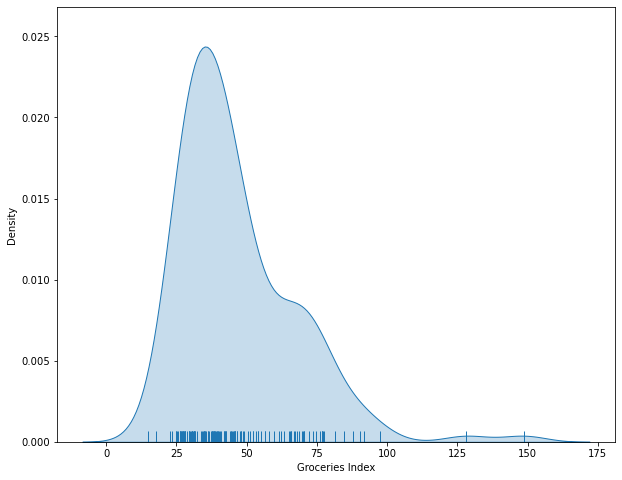

In [63]:
plt.figure(figsize=(10,8))
sns.distplot(column_df['Groceries Index'],
            hist = False,
            rug = True,
            kde_kws={'shade':True})
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


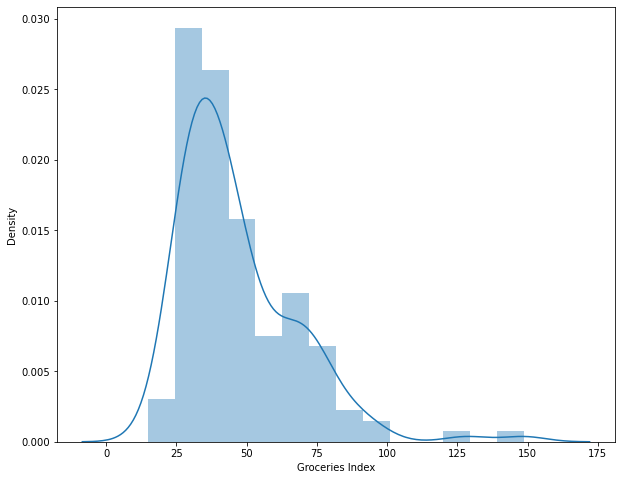

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(10,8))
sns.distplot(column_df['Groceries Index'])
plt.show()
# clear the distplot
plt.clf()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


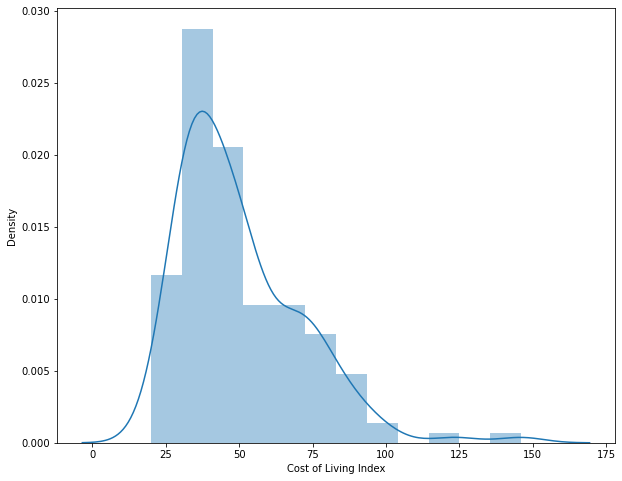

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(10,8))
sns.distplot(column_df['Cost of Living Index'])
plt.show()
# clear the distplot
plt.clf()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


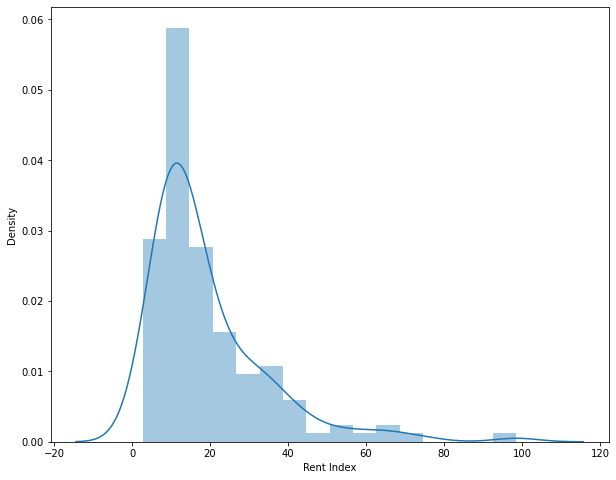

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(10,8))
sns.distplot(column_df['Rent Index'])
plt.show()
# clear the distplot
plt.clf()

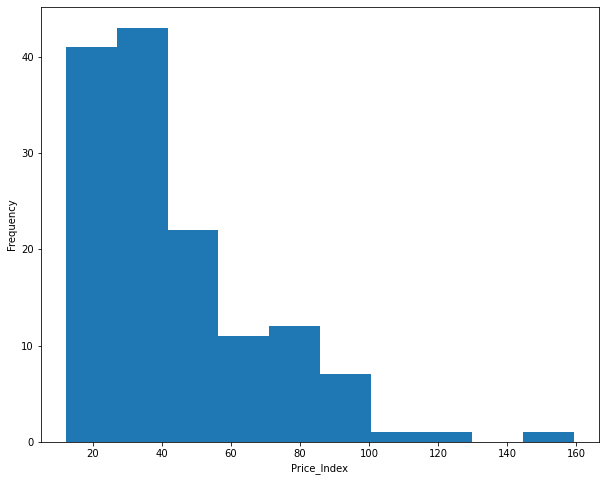

In [67]:
plt.figure(figsize=(10,8))
plt.hist(column_df['Restaurant Price Index'])
plt.xlabel('Price_Index')
plt.ylabel('Frequency')
plt.show()

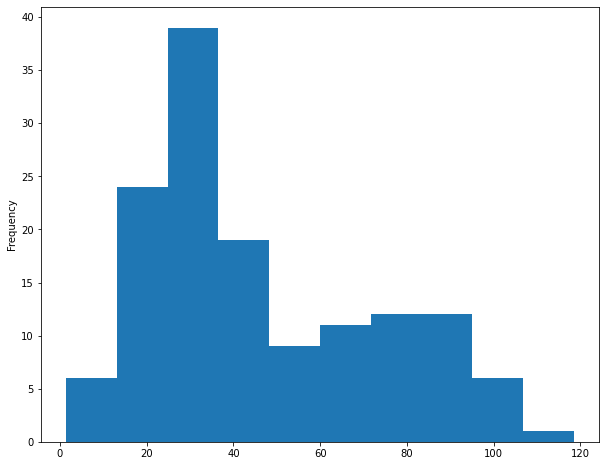

In [68]:
plt.figure(figsize=(10,8))
plt.hist(column_df['Local Purchasing Power Index'])
plt.ylabel('Frequency')
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


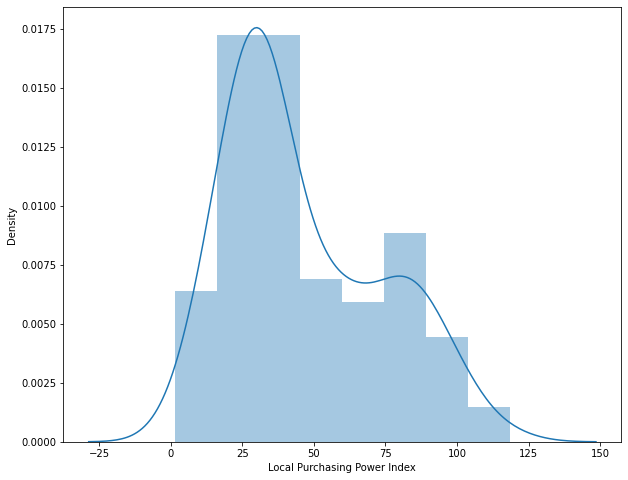

<Figure size 432x288 with 0 Axes>

In [69]:
plt.figure(figsize=(10,8))
sns.distplot(column_df['Local Purchasing Power Index'])
plt.show()
# clear the distplot
plt.clf()

## COMPARISONS

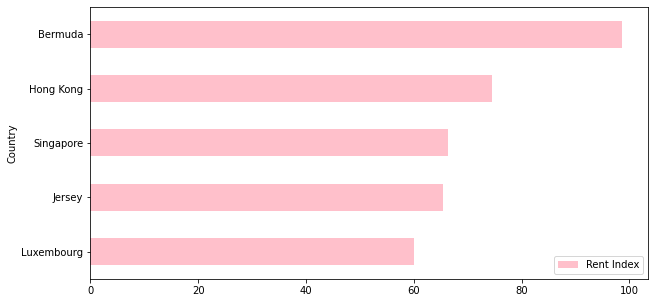

In [70]:
col_df= column_df[['Country','Rent Index']].sort_values(by= 'Rent Index').tail(5).plot.barh(x = 'Country',y='Rent Index',color='pink',figsize=(10,5))

## Most Exensive Resturant 

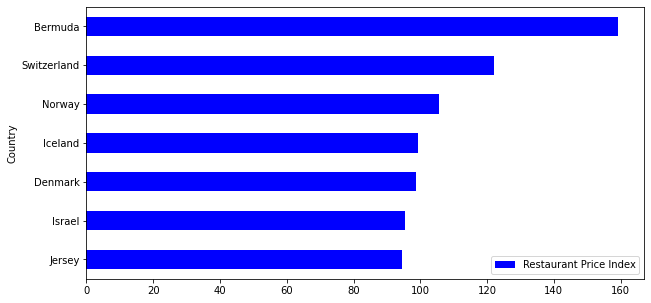

In [71]:
col_df= column_df[['Country','Restaurant Price Index']].sort_values(by= 'Restaurant Price Index').tail(7).plot.barh(x = 'Country',y='Restaurant Price Index',color='blue',figsize=(10,5))

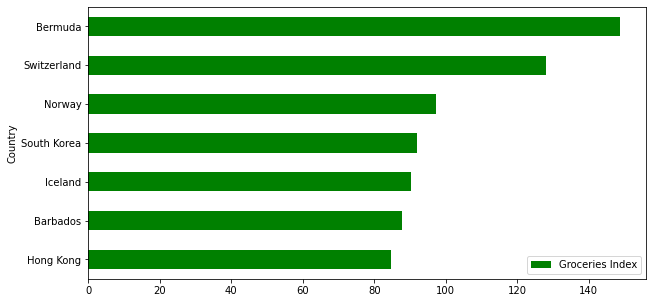

In [72]:

col_df= column_df[['Country','Groceries Index']].sort_values(by= 'Groceries Index').tail(7).plot.barh(x = 'Country',y='Groceries Index',color='green',figsize=(10,5))
